---
title: "Simple Linear Regression Modeling"
format:
  html:
    code-fold: true
jupyter: python3
author: "kakamana"
date: "2023-01-08"
categories: [python, datacamp, statistics, machine learning, linear regression, logistic regression ]
image: "simpleLinearRegressionModeling.jpg"

---

# Simple Linear Regression Modeling

We will learn the basics of this popular statistical model, what regression is, and how linear and logistic regressions differ. We’ll then learn how to fit simple linear regression models with numeric and categorical explanatory variables, and how to describe the relationship between the response and explanatory variables using model coefficients

This **Simple Linear Regression Modeling** is part of [Datacamp course: Introduction to Regression with statsmodels in Python](https://app.datacamp.com/learn/courses/introduction-to-regression-with-statsmodels-in-python)

This is my learning experience of data science through DataCamp

In [21]:
# Import seaborn with alias sns
import pandas as pd
import seaborn as sns

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

In [22]:
taiwan_real_estate=pd.read_csv("dataset/taiwan_real_estate2.csv")
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


# What is regression?

Before diving into **Regression** we need to have brief overview of **Descriptive statistics**

**Descriptive statistics**:
An example of descriptive statistics would be a summary of a given data set, which can be either a complete representation of a population or a sample of that population. There are two types of descriptive statistics: measures of central tendency and measures of variability (spread). The mean, median, and mode are measures of central tendency, whereas the standard deviation, variance, minimum and maximum variables, kurtosis, and skewness are measures of variability

**Variables & their relationship**:

While finding relationship b/w two variables (there can be more than two variables, but lets stick to two variable consideration for this article), we can identify following type of variables:

    x = independent / explanatory variable
    y = dependent / response variable.


**Regression**:
A regression is a statistical technique that relates a dependent variable to one or more independent (explanatory) variables

* Statistical models to explore the relationship a response variable and some explanatory variables.
* It is possible to predict the values of the response variable based on the values of the explanatory variables

**Types of regression**:
* Linear regression: The response variable is numeric.
* Logistic regression: The response variable is logical.

In simple linear/logistic regression, there is only one explanatory variable

In python there are two packages / libraries for regression mostly uses are:
* statsmodel: Optimized for insights
* scikit-learn: Optimized for prediction

### Visualizing two numeric variables with linear trend line

We'll look at the relationship between house price per area and the number of nearby convenience stores using the Taiwan real estate dataset.

One challenge in this dataset is that the number of convenience stores contains integer data, causing points to overlap. To solve this, you will make the points transparent.

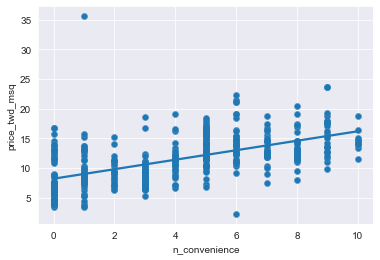

In [23]:
# Draw the scatter plot
sns.scatterplot(x='n_convenience', y='price_twd_msq', data=taiwan_real_estate)
# Draw a trend line on the scatter plot of price_twd_msq vs. n_convenience
sns.regplot(x="n_convenience",  y="price_twd_msq",                data=taiwan_real_estate,
         ci=None,
         scatter_kws={'alpha': 0.5})
# Show the plot
plt.show()

## Fitting a linear regression

Straight lines are defined by two things:

* Intercept: The y value at the point when x is zero.
* Slope: The amount the y value increases if you increase x by one.
* Equation: y = intercept + slope ∗ x

![](Images/estimating slope.png)

## Linear regression with ols()

While sns.regplot() can display a linear regression trend line, it doesn't give you access to the intercept and slope as variables, or allow you to work with the model results as variables. That means that sometimes you'll need to run a linear regression yourself.

In [24]:
# Import the ols function
from statsmodels.formula.api import ols

# Create the model object
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


## Categorical explanatory variables

Variables that categorize observations are known as categorical variables. Known as levels, they have a limited number of values. Gender is a categorical variable that can take two levels: Male or Female.

Numbers are required for regression analysis. It is therefore necessary to make the results interpretable when a categorical variable is included in a regression model.

A set of binary variables is created by recoding categorical variables. The recoding process creates a contrast matrix table by "dummy coding"

There are two type of data variables:
* Quantitative data: refers to amount
    * Data collected quantitatively represents actual amounts that can be added, subtracted, divided, etc. Quantitative variables can be:
         * discrete (integer variables): count of individual items in record e.g. No. of players
         * continuous (ratio variables): continuous / non-finite value measurements e.g. distance, age etc
* Categorical: refers to grouping
    There are three types of categorical variables:
        * binary: yes / no e.g. head/tail of coin flip
        * nominal: group with no rank or order b/w them e.g. color, brand, species etc
        * ordinal: group that can be ranked in specific order e.g. rating scale in survey result



## Visualizing numeric vs. categorical

If the explanatory variable is categorical, the scatter plot that you used before to visualize the data doesn't make sense. Instead, a good option is to draw a histogram for each category.

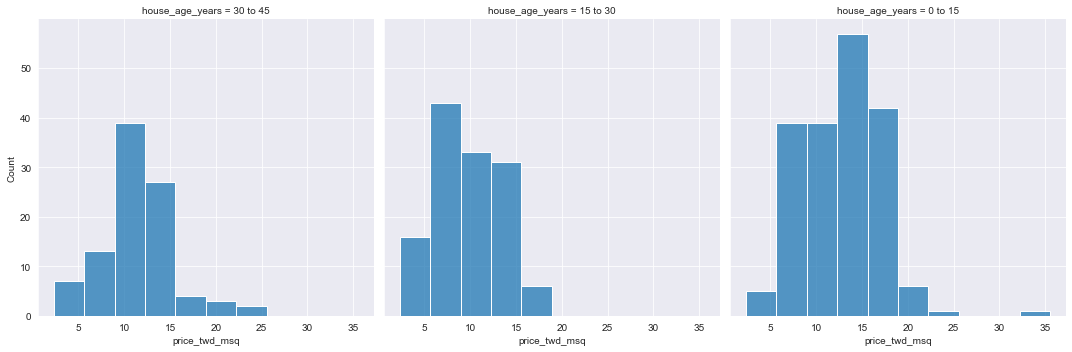


It appears that new houses are the most expensive on average, and the medium aged ones (15 to 30 years) are the cheapest.


In [25]:
# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(data=taiwan_real_estate,
         x='price_twd_msq',
         col='house_age_years',
         bins=10)

# Show the plot
plt.show()
print("\nIt appears that new houses are the most expensive on average, and the medium aged ones (15 to 30 years) are the cheapest.")

## Using categories to calculate means

Using summary statistics for each category is a good way to explore categorical variables further. Using a categorical variable, you can calculate the mean and median of your response variable. Therefore, you can compare each category in more detail.

In [26]:
# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = taiwan_real_estate.groupby('house_age_years')['price_twd_msq'].mean()

# Print the result
print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


## Is coefficient of linear regression model is mean of each category?

While calculating linear regression with categorical explanatory variable, means of each category will also coefficient of linear regression but this hold true in case with only one categorical variable. Lets verify this

In [27]:
# Create the model, fit it
mdl_price_vs_age = ols("price_twd_msq ~ house_age_years", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


In [28]:
# Update the model formula to remove the intercept
mdl_price_vs_age0 = ols("price_twd_msq ~ house_age_years + 0", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age0.params)
print("\n The coefficients of the model are just the means of each category you calculated previously. Fantastic job! ")

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64

 The coefficients of the model are just the means of each category you calculated previously. Fantastic job! 
